In [1]:
# !pip install numpy
# !pip install pandas
# !pip install  rdkit
# !pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 5.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 3.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 6.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 4.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 694.1 kB/s eta 0:00:000:00:01


In [2]:
import pandas as pd 

pd.read_csv("KIBA.csv")

,CHEMBLID,ProteinID,compound_iso_smiles,target_sequence,"Ki , Kd and IC50 (KIBA Score)"
0,CHEMBL373751,P53350,COC1=C(C=C2C(=C1)N=CN2C3=CC(=C(S3)C#N)OCC4=CC=...,MSAAVTAGKLARAPADPGKAGVPGVAAPGAPAAAPPAKEIPEVLVD...,0.000000
1,CHEMBL373751,P00533,COC1=C(C=C2C(=C1)N=CN2C3=CC(=C(S3)C#N)OCC4=CC=...,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,1.100000
2,CHEMBL373751,P04626,COC1=C(C=C2C(=C1)N=CN2C3=CC(=C(S3)C#N)OCC4=CC=...,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,1.100000
3,CHEMBL373751,P49840,COC1=C(C=C2C(=C1)N=CN2C3=CC(=C(S3)C#N)OCC4=CC=...,MSGGGPSGGGPGGSGRARTSSFAEPGGGGGGGGGGPGGSASGPGGT...,1.300000
4,CHEMBL373751,P49841,COC1=C(C=C2C(=C1)N=CN2C3=CC(=C(S3)C#N)OCC4=CC=...,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,1.300000
...,...,...,...,...,...
118249,CHEMBL272938,P17948,CC1=CC(=CC=C1)NC(=O)NC2=CC=C(C=C2)C3=CN=CC4=C3...,MVSYWDTGVLLCALLSCLLLTGSSSGSKLKDPELSLKGTQHIMQAG...,16.400162
118250,CHEMBL1082152,P49841,CN1C=C(C2=C1C=CC(=C2)F)C3=C(C(=O)NC3=O)C4=CC(=...,MSGRPRTTSFAESCKPVQQPSAFGSMKVSRDKDGSKVTTVVATPGQ...,16.518218
118251,CHEMBL29197,P00533,COC1=C(C=C2C(=C1)C(=NC=N2)NC3=CC(=CC=C3)Br)OC,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,16.799108
118252,CHEMBL66031,P00533,C1=CC(=CC(=C1)Br)NC2=NC=NC3=CC4=C(C=C32)NC=N4,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,17.196910


In [3]:
import os
import numpy as np
import pandas as pd

def load_and_prepare_data_from_csv(csv_path, dataset_name):
    # Create directories
    dataset_dir = dataset_name
    proteins_dir = os.path.join(dataset_dir, 'proteins')
    molecules_dir = os.path.join(dataset_dir, 'molecules')
    
    os.makedirs(proteins_dir, exist_ok=True)
    os.makedirs(molecules_dir, exist_ok=True)
    
    # Load the CSV file
    data = pd.read_csv(csv_path)

    # Process and save proteins in FASTA format
    for index, row in data.iterrows():
        protein_id = row['ProteinID']
        sequence = row['target_sequence']
        fasta_file = os.path.join(proteins_dir, f"{protein_id}.fasta")
        with open(fasta_file, 'w') as f:
            f.write(f">{protein_id}\n")
            # Split the sequence into 60-character lines, as is typical in FASTA format
            for i in range(0, len(sequence), 60):
                f.write(sequence[i:i+60] + "\n")

    # Process and save molecules (SMILES) in .npy format
    for index, row in data.iterrows():
        chembl_id = row['CHEMBLID']
        smiles = row['compound_iso_smiles']
        npy_file = os.path.join(molecules_dir, f"{chembl_id}.npy")
        np.save(npy_file, smiles)

    # Prepare affinity data
    affinity_data = []
    for index, row in data.iterrows():
        protein_id = row['ProteinID']
        chembl_id = row['CHEMBLID']
        affinity_value = row['Ki , Kd and IC50  (KIBA Score)']
        affinity_data.append((protein_id, chembl_id, affinity_value))
    
    # Save affinity data
    np.save(os.path.join(dataset_dir, 'affinity_data.npy'), affinity_data)

# Example usage:
csv_path = 'KIBA.csv'  # Path to the KIBA CSV file
load_and_prepare_data_from_csv(csv_path, 'kiba_dataset')


In [8]:
import os
import numpy as np
from rdkit import Chem
import networkx as nx

def create_molecule_graphs(molecule_dir):
    molecule_graphs = []

    for filename in os.listdir(molecule_dir):
        if filename.endswith('.npy'):
            # Load SMILES string from the .npy file and convert to string
            file_path = os.path.join(molecule_dir, filename)
            smiles = np.load(file_path, allow_pickle=True)  # Load the numpy file

            if isinstance(smiles, np.ndarray):  # If it is a numpy array
                smiles = smiles.item()  # Convert numpy object to string if necessary

            # Convert SMILES to RDKit molecule object
            mol = Chem.MolFromSmiles(smiles)
            if mol is None:
                print(f"Invalid SMILES: {smiles} in {filename}")
                continue

            num_atoms = mol.GetNumAtoms()

            # Extract atom features for each atom in the molecule
            atom_list = ['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na', 'Ca', 
                         'Fe', 'As', 'Al', 'I', 'B', 'V', 'K', 'Tl', 'Yb', 'Sb', 'Sn', 
                         'Ag', 'Pd', 'Co', 'Se', 'Ti', 'Zn', 'H', 'Li', 'Ge', 'Cu', 
                         'Au', 'Ni', 'Cd', 'In', 'Mn', 'Zr', 'Cr', 'Pt', 'Hg', 'Pb', 'X']

            features = []
            for atom in mol.GetAtoms():
                # One-hot encoding of atom type
                atom_encoding = [1 if atom.GetSymbol() == atom_type else 0 for atom_type in atom_list]

                # One-hot encoding of atom degree (number of neighbors)
                degree_encoding = [1 if atom.GetDegree() == i else 0 for i in range(11)]

                # One-hot encoding of number of explicit hydrogens
                num_H_encoding = [1 if atom.GetTotalNumHs() == i else 0 for i in range(11)]

                # One-hot encoding of number of implicit hydrogens
                implicit_H_encoding = [1 if atom.GetImplicitValence() == i else 0 for i in range(11)]

                # Whether the atom is aromatic (1 or 0)
                aromatic_encoding = [1 if atom.GetIsAromatic() else 0]

                # Concatenate all features (78-dimensional feature vector)
                feature_vector = atom_encoding + degree_encoding + num_H_encoding + implicit_H_encoding + aromatic_encoding
                features.append(feature_vector)

            # Create edges from bond information
            edges = []
            for bond in mol.GetBonds():
                i = bond.GetBeginAtomIdx()
                j = bond.GetEndAtomIdx()
                edges.append([i, j])

            # Create a directed graph from the edges
            g = nx.Graph(edges).to_directed()
            edge_index = np.array([[i, j] for i, j in g.edges])

            # Append graph data (number of atoms, features, edges) for each molecule
            molecule_graphs.append({
                'num_atoms': num_atoms,
                'features': np.array(features),
                'edge_index': edge_index,
                'smiles': smiles
            })

    return molecule_graphs

# Example usage:
molecule_dir = 'kiba_dataset/molecules'
molecule_graphs = create_molecule_graphs(molecule_dir)

# Print details of the first molecule graph
print("First molecule graph:")
print("Number of atoms:", molecule_graphs[0]['num_atoms'])
print("Features:", molecule_graphs[0]['features'])
print("Edge index:", molecule_graphs[0]['edge_index'])
print("SMILES:", molecule_graphs[0]['smiles'])


First molecule graph:
Number of atoms: 21
Features: [[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 1]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
Edge index: [[ 0  1]
 [ 0 20]
 [ 1  0]
 [ 1  2]
 [ 1  9]
 [ 2  1]
 [ 2  3]
 [ 3  2]
 [ 3  4]
 [ 3  8]
 [ 4  3]
 [ 4  5]
 [ 5  4]
 [ 5  6]
 [ 6  5]
 [ 6  7]
 [ 7  6]
 [ 7  8]
 [ 8  7]
 [ 8  3]
 [ 9  1]
 [ 9 10]
 [ 9 11]
 [10  9]
 [11  9]
 [11 12]
 [11 19]
 [12 11]
 [12 13]
 [13 12]
 [13 14]
 [13 18]
 [14 13]
 [14 15]
 [15 14]
 [15 16]
 [16 15]
 [16 17]
 [17 16]
 [17 18]
 [18 17]
 [18 13]
 [19 11]
 [19 20]
 [20 19]
 [20  0]]
SMILES: C1C(=CC2=CC=CC=N2)C(=O)C(=CC3=CC=CC=N3)CN1


In [12]:
# Checking the feature set dimensions for the first molecule
first_molecule_features = molecule_graphs[0]['features']

# Print the shape of the feature set
print("Shape of the feature set for each atom (Number of atoms, Feature vector size):", first_molecule_features.shape)


Shape of the feature set for each atom (Number of atoms, Feature vector size): (21, 78)


In [15]:
# !pip install matplotlib

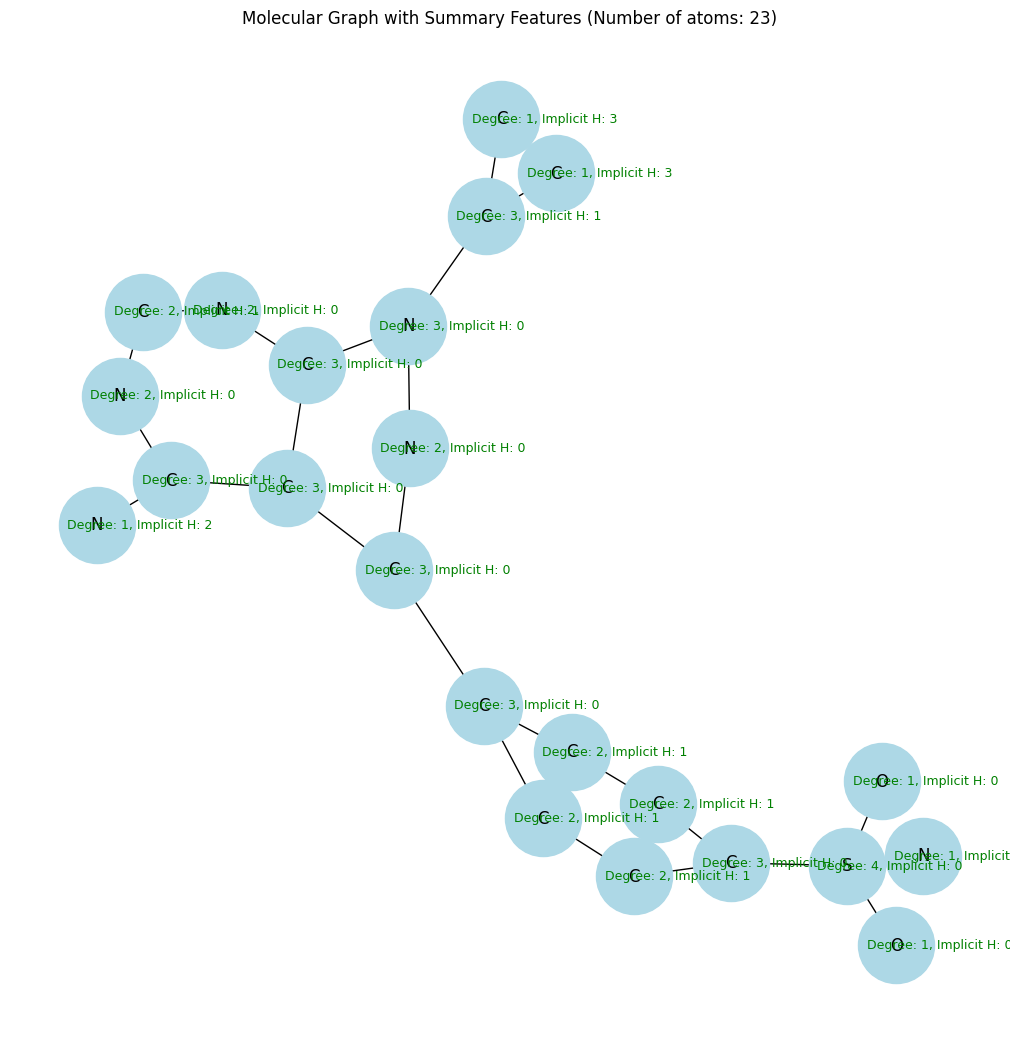

In [25]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_molecule_graph_with_summary_features(molecule_graph):
    G = nx.Graph()
    
    # Add nodes (atoms) to the graph
    atom_labels = {}  # Labels for atom types inside the nodes
    feature_summary_labels = {}  # Labels for feature set summaries outside the nodes
    
    for i in range(molecule_graph['num_atoms']):
        G.add_node(i)
        
        # Get the atom type from the first 44 dimensions of the feature vector
        atom_type_index = molecule_graph['features'][i][:44].argmax()
        atom_list = ['C', 'N', 'O', 'S', 'F', 'Si', 'P', 'Cl', 'Br', 'Mg', 'Na', 'Ca', 
                     'Fe', 'As', 'Al', 'I', 'B', 'V', 'K', 'Tl', 'Yb', 'Sb', 'Sn', 
                     'Ag', 'Pd', 'Co', 'Se', 'Ti', 'Zn', 'H', 'Li', 'Ge', 'Cu', 
                     'Au', 'Ni', 'Cd', 'In', 'Mn', 'Zr', 'Cr', 'Pt', 'Hg', 'Pb', 'X']
        atom_type = atom_list[atom_type_index]
        
        # Get the key summary of the feature set (atom type and degree)
        degree = molecule_graph['features'][i][44:55].argmax()  # Atom degree
        implicit_H = molecule_graph['features'][i][55:66].argmax()  # Implicit Hydrogens
        
        # Atom type label inside the node
        atom_labels[i] = atom_type
        
        # Summary of features next to the node
        feature_summary_labels[i] = f"Degree: {degree}, Implicit H: {implicit_H}"

    # Add edges (bonds) between atoms
    for edge in molecule_graph['edge_index']:
        G.add_edge(edge[0], edge[1])

    # Generate layout for graph nodes
    pos = nx.spring_layout(G, seed=42)  # Positions for all nodes (seed for reproducibility)
    
    plt.figure(figsize=(10, 10))
    
    # Draw the nodes (atoms) and edges (bonds)
    nx.draw(G, pos, with_labels=False, node_color='lightblue', node_size=3000, font_size=10, font_color='black', font_weight='bold')
    
    # Draw the atom type inside the node
    nx.draw_networkx_labels(G, pos, atom_labels, font_size=12, font_color='black')
    
    # Offset the feature summary labels so they don't overlap with the nodes
    pos_features = {k: (v[0] + 0.1, v[1]) for k, v in pos.items()}  # Shift feature labels slightly to the right
    
    # Draw the feature summary (degree and implicit H count) next to each node
    nx.draw_networkx_labels(G, pos_features, feature_summary_labels, font_size=9, font_color='green')
    
    plt.title(f"Molecular Graph with Summary Features (Number of atoms: {molecule_graph['num_atoms']})")
    
    # Explicitly call show() to display the plot
    plt.show()

# Example usage to plot the first molecule graph:
plot_molecule_graph_with_summary_features(molecule_graphs[20])


In [26]:
import os
import pickle
import networkx as nx

def save_molecule_graphs(molecule_graphs, save_dir="molecule_graphs"):
    # Create the directory if it does not exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Save each molecular graph as a pickle file
    for i, molecule_graph in enumerate(molecule_graphs):
        save_path = os.path.join(save_dir, f"molecule_graph_{i}.pkl")
        with open(save_path, 'wb') as f:
            pickle.dump(molecule_graph, f)

    print(f"Saved {len(molecule_graphs)} molecular graphs to {save_dir}")

# Example usage to save the graphs:
save_molecule_graphs(molecule_graphs)


Saved 2111 molecular graphs to molecule_graphs
